In [96]:
# Importing the necessary libraries:
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')  #this will ignore the warnings.it wont display warnings in notebook

In [3]:
# # Importing the data through the url
# DOWNLOAD_ROOT ="https://www.kaggle.com/fernandol/countries-of-the-world"
# COUNTRIES_PATH = os.path.join("datasets", "countries of the world")
# COUNTRIES_URL = DOWNLOAD_ROOT + "datasets/countries-of-the-world/countries.tgz"

In [7]:
# # function that will fetch the data:
# def fetch_countries_data(countries_url=COUNTRIES_URL, countries_path=COUNTRIES_PATH):
#     if not os.path.isdir(countries_path):
#         os.makeddirs(countries_path)
#     tgz_path = os.path.join(countries_path, "countries.tgz")
#     urllib.request.urlretrieve(countries_url, tgz_path)
#     countries_tgz = tarfile.open(tgz_path)
#     countries_tgz.extractall(path=countries_path)
#     countries_tgz.close()
        

In [8]:
# # function to load the dataset:
# def load_countries_data(countries_path=COUNTRIES_PATH):
#     csv_path = os.path.join(countries_path, "countries.csv")
#     return pd.read_csv(csv_path)

In [11]:
# # Read the structure of the data:
# countries_df = load_countries_data()
# countries_df.head()

In [135]:
# Manually reading the dataframe:
countries_df = pd.read_csv(r"C:\Users\tmmda\OneDrive\Desktop\Maxim Nyansa\CSV files\countries of the world.csv", decimal=',')

## Exploring the structure of the data

In [168]:
# quick look at the structure of the data:
countries_df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.099,0.272,0.571
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.099,0.272,0.571


In [137]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         224 non-null float64
Infant mortality (per 1000 births)    224 non-null float64
GDP ($ per capita)                    226 non-null float64
Literacy (%)                          209 non-null float64
Phones (per 1000)                     223 non-null float64
Arable (%)                            225 non-null float64
Crops (%)                             225 non-null float64
Other (%)                             225 non-null float64
Climate                               205 non-null float64
Birthrate       

In [138]:
# get the type:
type(countries_df)

pandas.core.frame.DataFrame

In [139]:
# Using the .shape to get the number of columns and rows:
countries_df.shape

(227, 20)

In [140]:
# categorizing region value_counts()
countries_df["Country"].value_counts()

Nicaragua            1
Malta                1
Liberia              1
Costa Rica           1
Yemen                1
                    ..
Czech Republic       1
Marshall Islands     1
Spain                1
Aruba                1
Paraguay             1
Name: Country, Length: 227, dtype: int64

In [178]:
# View summary statistics:
countries_df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.037621,35.315242,9671.585903,83.604405,235.006608,13.767357,4.533084,81.674097,2.125551,22.070793,9.216652,0.147419,0.281956,0.565661
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856712,35.193412,10030.645350,19.100523,226.103017,12.986425,8.330968,16.073758,0.665761,11.108805,4.949120,0.142429,0.133316,0.160249
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,8.215000,1900.000000,76.400000,38.500000,3.380000,0.190000,71.985000,2.000000,12.725000,5.975000,0.040000,0.200000,0.443500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.900000,20.000000,4.435000,95.230000,2.250000,29.770000,10.580000,0.211000,0.335000,0.671500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [179]:
# Checking for any missing values:
countries_df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64

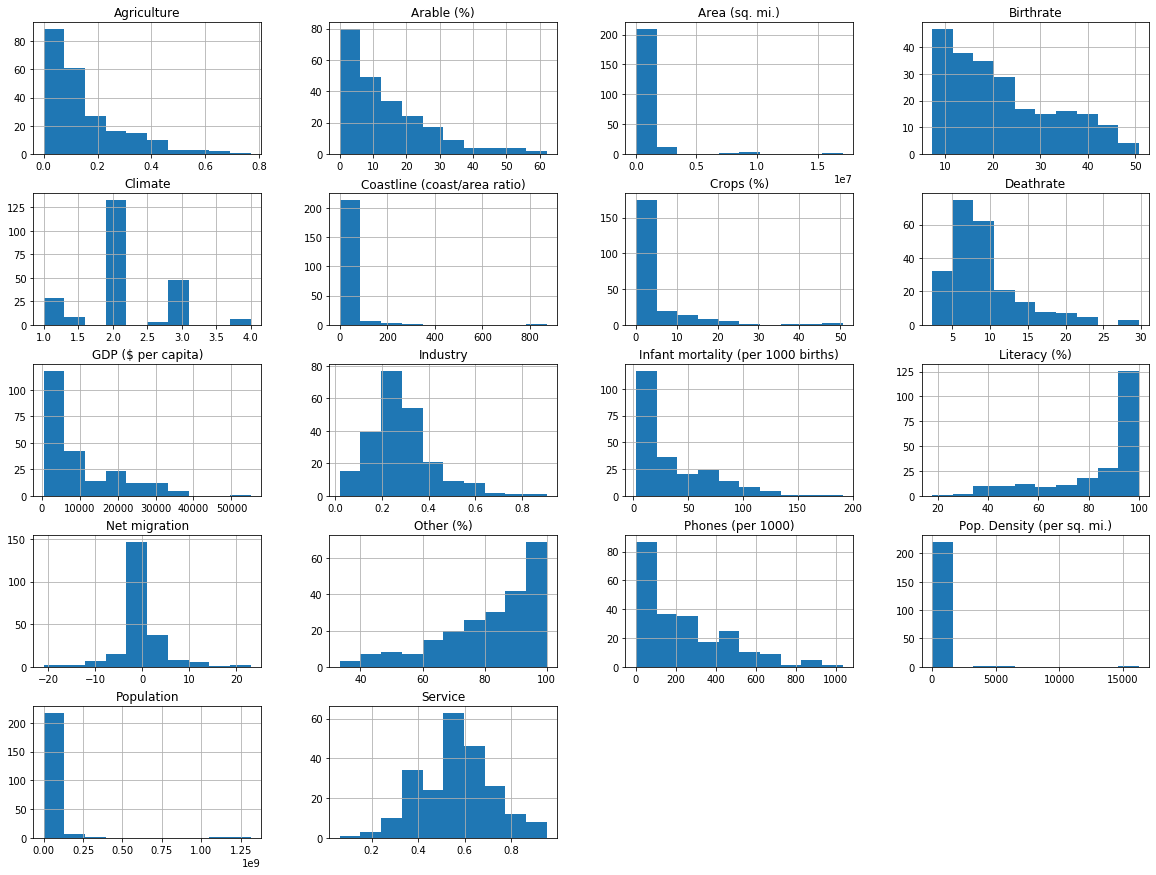

In [180]:
# summary graphs:
countries_df.hist(bins=10, figsize=(20, 15))
plt.show()

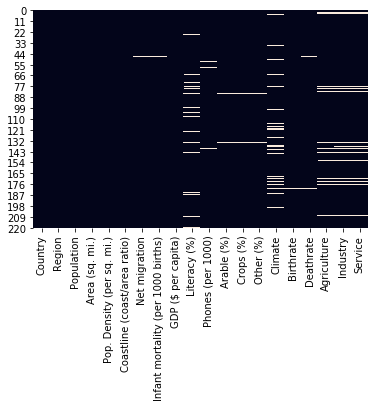

In [144]:
# visualizing missing values:
sns.heatmap(countries_df.isnull(), cbar=False);

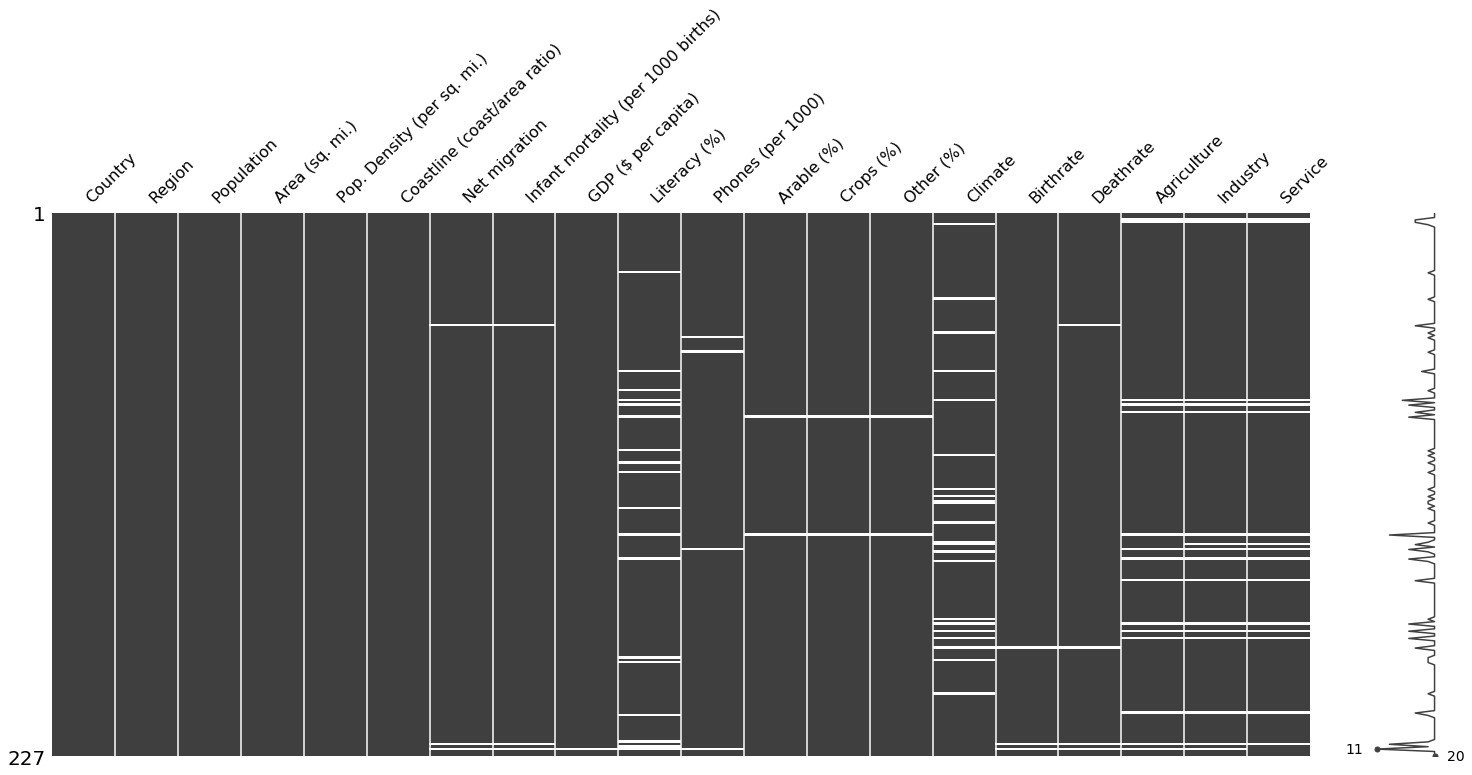

In [145]:
msno.matrix(countries_df);

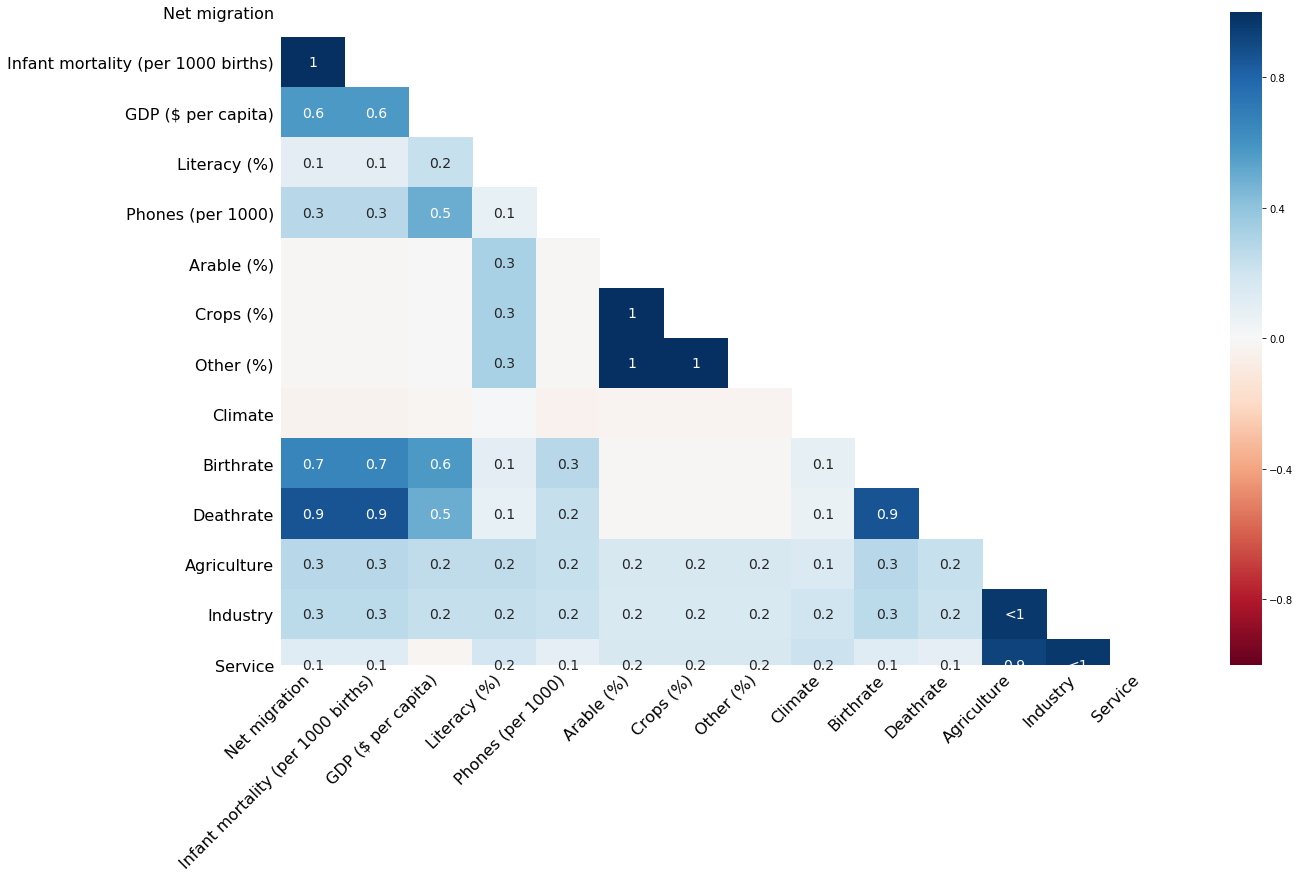

In [146]:
msno.heatmap(countries_df);

In [177]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
Country                               227 non-null object
Region                                227 non-null object
Population                            227 non-null int64
Area (sq. mi.)                        227 non-null int64
Pop. Density (per sq. mi.)            227 non-null float64
Coastline (coast/area ratio)          227 non-null float64
Net migration                         227 non-null float64
Infant mortality (per 1000 births)    227 non-null float64
GDP ($ per capita)                    227 non-null float64
Literacy (%)                          227 non-null float64
Phones (per 1000)                     227 non-null float64
Arable (%)                            227 non-null float64
Crops (%)                             227 non-null float64
Other (%)                             227 non-null float64
Climate                               227 non-null float64
Birthrate       

In [148]:
countries_df["Service"].value_counts()

0.684    5
0.620    4
0.550    4
0.579    3
0.549    3
        ..
0.260    1
0.540    1
0.197    1
0.699    1
0.615    1
Name: Service, Length: 167, dtype: int64

## Data cleaning

#### Filling the NaN series with the median values:

In [149]:
# Filling  the Net migration missing values with median value for each attributes/columns 
countries_df["Net migration"].fillna(countries_df['Net migration'].median(), inplace = True)

In [154]:
# Filling  the Infant mortality missing values with median value for each attributes/columns 
countries_df["Infant mortality (per 1000 births)"].fillna(countries_df['Infant mortality (per 1000 births)'].median(), inplace = True)

In [155]:
# Filling  the GDP ($ per capita) missing values with median value for each attributes/columns 
countries_df["GDP ($ per capita)"].fillna(countries_df['GDP ($ per capita)'].median(), inplace = True)

In [157]:
# Filling  the Literacy (%) missing values with median value for each attributes/columns 
countries_df["Literacy (%)"].fillna(countries_df['Literacy (%)'].median(), inplace = True)

In [158]:
# Filling  the Phones (per 1000) missing values with median value for each attributes/columns 
countries_df["Phones (per 1000)"].fillna(countries_df['Phones (per 1000)'].median(), inplace = True)

In [170]:
# Filling  the Arable (%) missing values with median value for each attributes/columns 
countries_df["Arable (%)"].fillna(countries_df['Arable (%)'].median(), inplace = True)

In [172]:
# Filling  the Crops (%) missing values with median value for each attributes/columns 
countries_df["Crops (%)"].fillna(countries_df['Crops (%)'].median(), inplace = True)

In [175]:
# Filling  the Arable (%) missing values with median value for each attributes/columns 
countries_df["Other (%)"].fillna(countries_df['Other (%)'].median(), inplace = True)

In [159]:
# Filling  the Climate missing values with median value for each attributes/columns 
countries_df["Climate"].fillna(countries_df['Climate'].median(), inplace = True)

In [165]:
# Filling  the Birthrate missing values with median value for each attributes/columns 
countries_df["Birthrate"].fillna(countries_df['Birthrate'].median(), inplace = True)

In [160]:
# Filling  the Deathrate missing values with median value for each attributes/columns 
countries_df["Deathrate"].fillna(countries_df['Deathrate'].median(), inplace = True)

In [161]:
# Filling  the Agriculture missing values with median value for each attributes/columns 
countries_df["Agriculture"].fillna(countries_df['Agriculture'].median(), inplace = True)

In [162]:
# Filling  the Industry missing values with median value for each attributes/columns 
countries_df["Industry"].fillna(countries_df['Industry'].median(), inplace = True)

In [163]:
# Filling  the Service missing values with median value for each attributes/columns 
countries_df["Service"].fillna(countries_df['Service'].median(), inplace = True)

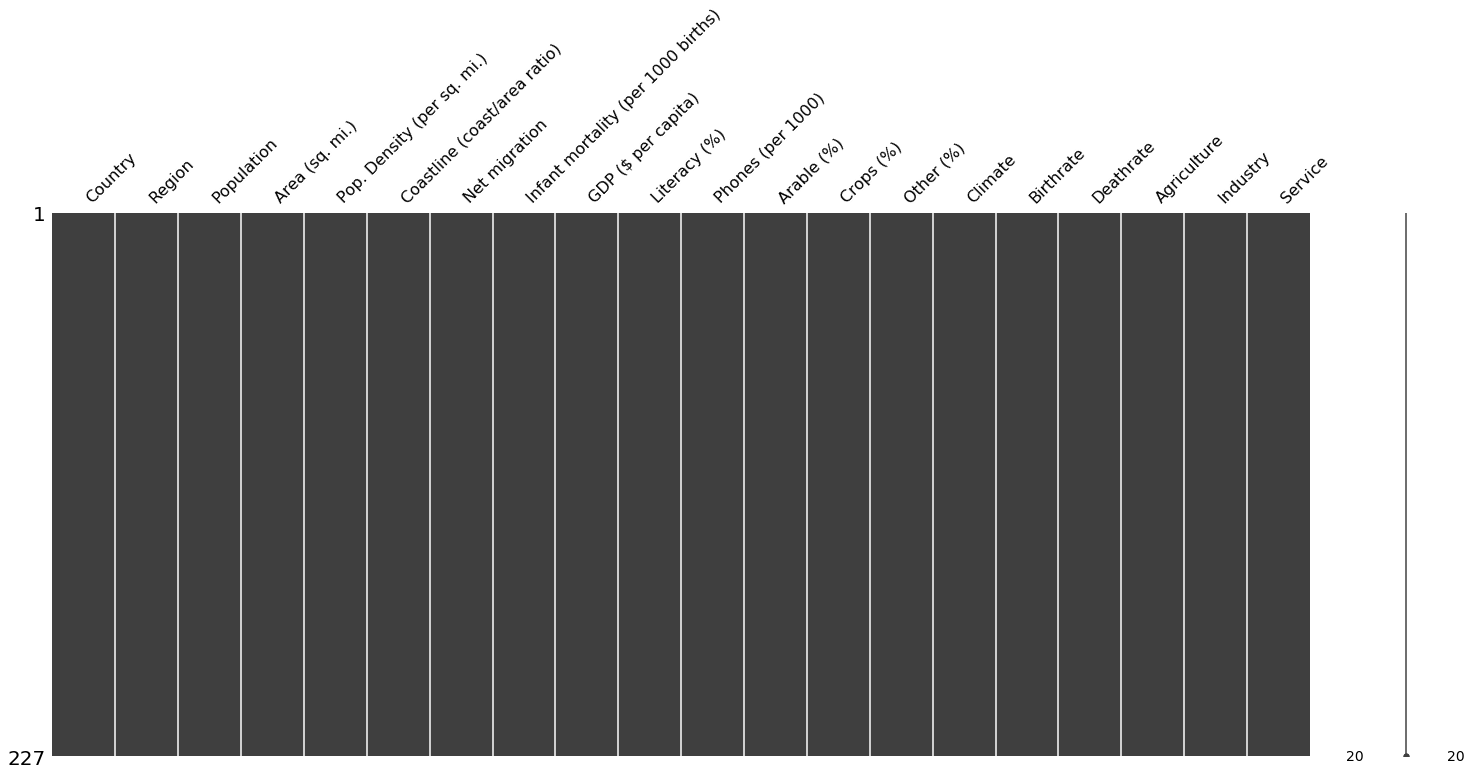

In [176]:
## visualizing after the filling the missing values:
msno.matrix(countries_df);

### General visualization using seaborn

In [193]:
countries_Vizcol = countries_df[['Population', 'Pop. Density (per sq. mi.)', 
                                 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 
                                 'Birthrate', 'Deathrate']]

In [194]:
countries_Vizcol.head()

,Population,Pop. Density (per sq. mi.),Infant mortality (per 1000 births),GDP ($ per capita),Birthrate,Deathrate
0,31056997,48.0,163.07,700.0,46.60,20.34
1,3581655,124.6,21.52,4500.0,15.11,5.22
2,32930091,13.8,31.00,6000.0,17.14,4.61
3,57794,290.4,9.27,8000.0,22.46,3.27
4,71201,152.1,4.05,19000.0,8.71,6.25


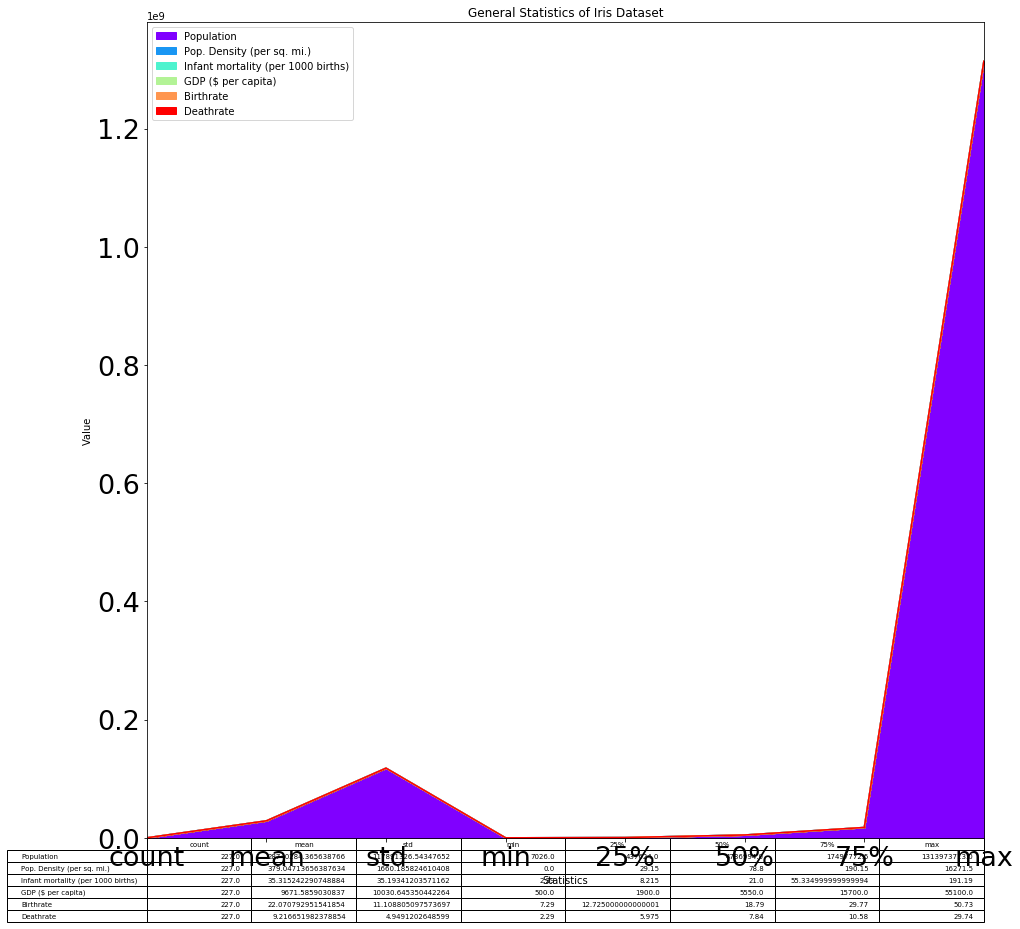

In [199]:
countries_Vizcol.describe().plot(kind = "area",fontsize=27, figsize = (15,15), table = True,colormap="rainbow")
plt.xlabel('Statistics',)
plt.ylabel('Value')
plt.title("General Statistics of Iris Dataset");

In [201]:
# # Bar Plot : Here the frequency of the observation is plotted
# sns.countplot('Country',data=countries_df)
# plt.show()

#### Joint plot: * Jointplot is seaborn library specific and can be used to quickly visualize and analyze the relationship between two variables and describe their individual distributions on the same plot.

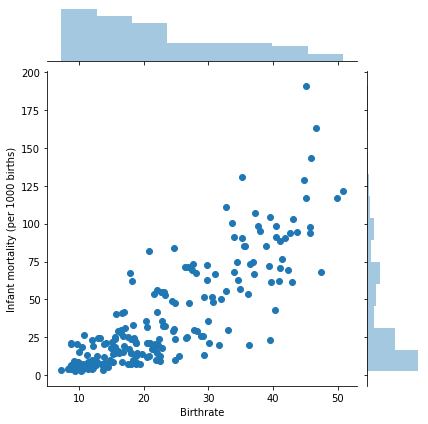

In [204]:
# jointplot showing the relationshipb/w Birthrate and Infant mortality (per 1000 births)
fig=sns.jointplot(x='Birthrate', y='Infant mortality (per 1000 births)',data=countries_df)

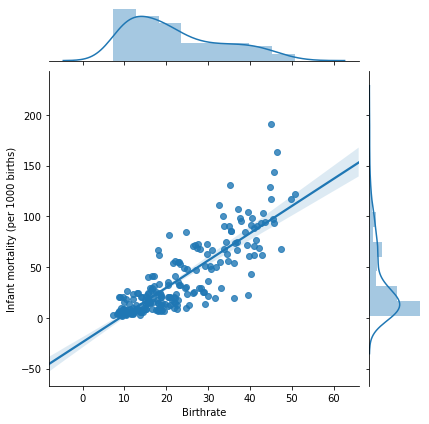

In [207]:
# jointplot showing the relationshipb/w Birthrate and Infant mortality (per 1000 births) with regression:
fig=sns.jointplot(x='Birthrate', y='Infant mortality (per 1000 births)',data=countries_df, kind='reg')

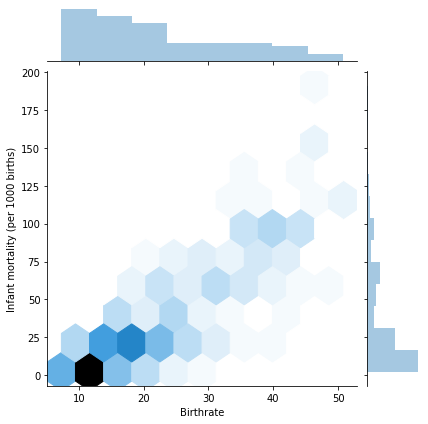

In [209]:
fig=sns.jointplot(x='Birthrate',y='Infant mortality (per 1000 births)', kind='hex',data=countries_df)

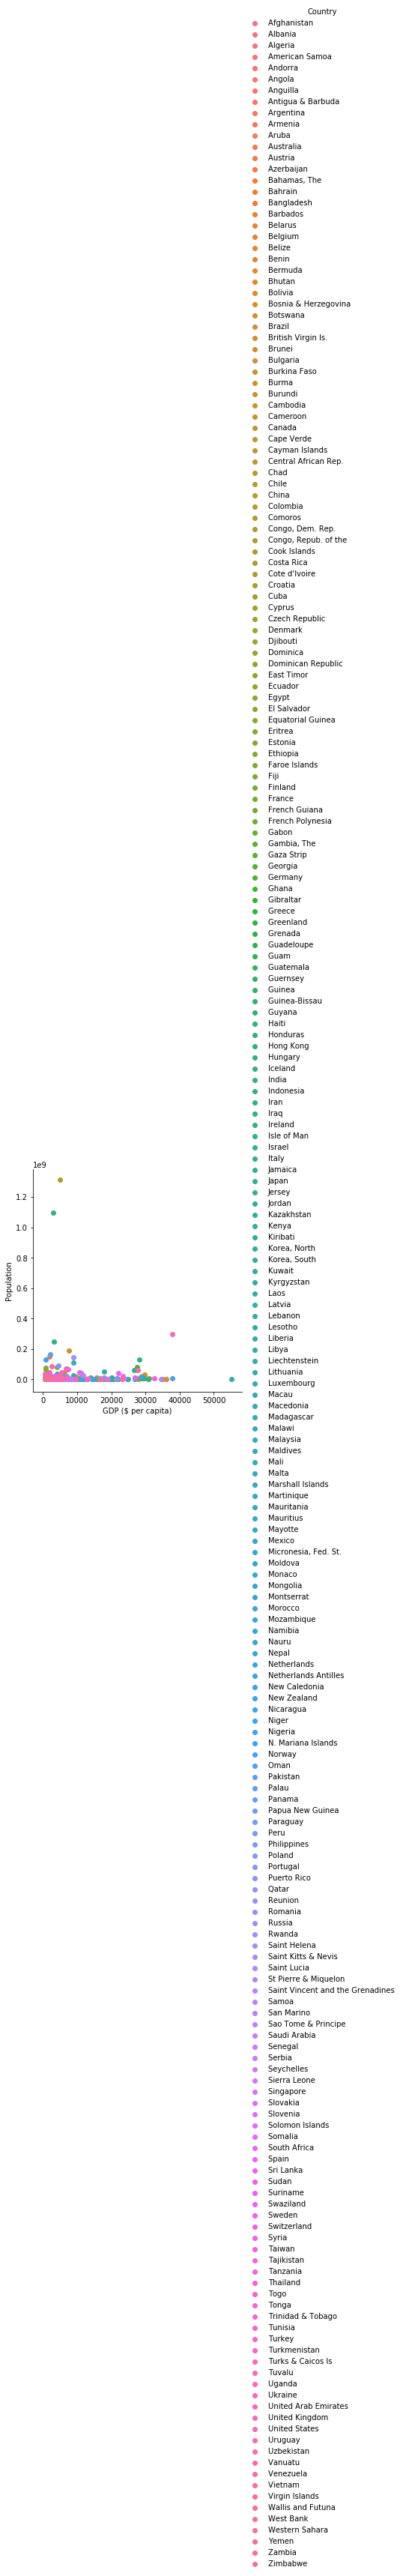

In [212]:
# plotting FacetGrid:
sns.FacetGrid(countries_df,hue='Country',size=5)\
.map(plt.scatter,'GDP ($ per capita)','Population')\
.add_legend();

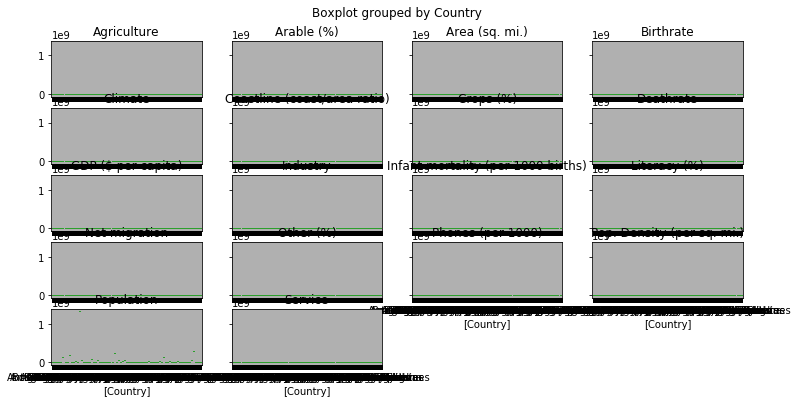

In [214]:
countries_df.boxplot(by="Country", figsize=(12, 6));